In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from datetime import datetime

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)
plt.style.use(['fivethirtyeight'])
import seaborn as sns



from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from dask.diagnostics import ProgressBar
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, f1_score, roc_curve, auc, precision_score,recall_score


display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df = pd.read_csv('final_merged_dataset.csv')

In [60]:
df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,854.0,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,895.0,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,898.0,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,879.0,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,882.0,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,Oxidation,dry,1160.350439,O2,34.56,0.199,18,710.197,...,883.0,153,582,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2902,13311,0,0.0525
1654,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,...,867.0,152,550,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2878,11133,0,0.0210
1655,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,...,868.0,152,542,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2821,11222,0,0.0210
1656,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,...,868.0,152,582,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2938,11311,0,0.0120


In [103]:
sum(df.defective) / len(df)

0.07297949336550061

In [100]:
np.mean(df.defective_chip_rate)

0.051294028950542865

In [61]:
df.groupby('chamber_path')['No_Die'].count()

chamber_path
11111    29
11122    12
11133    28
11211    12
11222    39
         ..
33222    34
33233     9
33311    26
33322     9
33333    25
Name: No_Die, Length: 81, dtype: int64

In [62]:
df[['chamber_path', 'chamber_total_count', 'Target', 'defective','defective_chip_rate']].sort_values(by='chamber_total_count')

,chamber_path,chamber_total_count,Target,defective,defective_chip_rate
696,33222,2704,96,0,0.0480
1042,33222,2704,56,0,0.0280
930,33222,2704,92,0,0.0460
1038,33222,2704,57,0,0.0285
869,33222,2704,81,0,0.0405
...,...,...,...,...,...
1216,11311,2938,99,0,0.0495
1213,11311,2938,95,0,0.0475
1656,11311,2938,24,0,0.0120
1358,11311,2938,102,0,0.0510


In [63]:
df['chamber_path'].value_counts().r601eset_index().rename({'index' : 'path', 'chamber_path' : 'count'}, axis=1)

,path,count
0,22222,43
1,23222,43
2,32222,42
3,13222,42
4,21222,41
...,...,...
76,23122,9
77,32233,8
78,23322,8
79,32322,8


In [64]:
temp = df.groupby('chamber_path')['No_Die'].count().reset_index().rename({'count' : 'path', 'No_Die' : 'count'}, axis=1);temp

,chamber_path,count
0,11111,29
1,11122,12
2,11133,28
3,11211,12
4,11222,39
...,...,...
76,33222,34
77,33233,9
78,33311,26
79,33322,9


In [65]:
label = list(temp['chamber_path'])
index = np.arange(len(label))

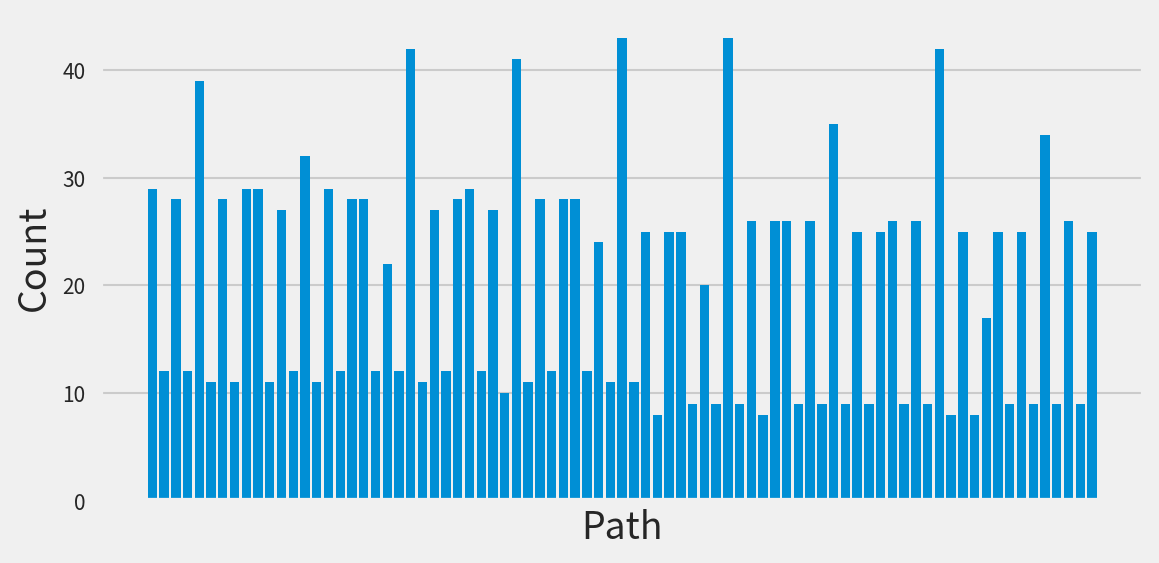

In [67]:
plt.figure(dpi=150, figsize=(8,4))
plt.bar(index, temp['count'])
plt.xticks([])
plt.xlabel('Path', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

In [73]:
temp.sort_values(by='count').head(5)

,chamber_path,count
43,22322,8
70,32322,8
52,23322,8
68,32233,8
79,33322,9


In [92]:
low_produce_path_list = list(temp.sort_values(by='count').head(5).chamber_path.values)

In [93]:
high_produce_path_list = list(temp.sort_values(by='count').tail(5).chamber_path.values)

In [94]:
df_high = df.query('chamber_path in @high_produce_path_list')

In [95]:
df_low = df.query('chamber_path in @low_produce_path_list');df_low

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
50,NOLSM3711420371,2,Oxidation,dry,1048.341956,O2,36.93,0.227,75,707.342,...,875.0,154,542,15,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 2 0 0 0 0 0 0 ...,2798,22322,0,0.0075
53,NOLSM3741423374,2,Oxidation,wet,1141.416407,H2O,38.57,0.214,100,699.636,...,916.0,150,542,120,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 2 0 0 0 0 0 0 ...,2798,22322,0,0.0600
84,NOLSM3981520398,2,Oxidation,wet,1103.383281,H2O,38.02,0.208,66,714.295,...,911.0,154,542,69,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 0 0 0 0 0 0 ...,2783,23322,0,0.0345
89,NOLSM4041526404,2,Oxidation,wet,926.465679,H2O,36.66,0.192,75,707.538,...,927.0,154,542,54,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2 0 0 0 0 0 0 ...,2783,23322,0,0.0270
226,NOLSM6142320614,2,Oxidation,dry,884.437008,O2,22.19,0.207,31,703.940,...,909.0,157,542,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 0 0 0 0 0 0 ...,2798,22322,0,0.0525
229,NOLSM6172323617,2,Oxidation,dry,879.651678,O2,22.22,0.212,34,708.419,...,913.0,158,542,99,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 0 0 0 0 0 0 ...,2798,22322,0,0.0495
232,NOLSM6202326620,2,Oxidation,dry,889.979732,O2,22.25,0.212,32,708.823,...,916.0,158,542,51,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 0 0 0 0 0 0 ...,2798,22322,0,0.0255
295,NOLSM6412420641,2,Oxidation,dry,880.018474,O2,22.16,0.204,25,709.539,...,909.0,156,542,93,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 0 0 0 0 0 ...,2783,23322,0,0.0465
298,NOLSM6442423644,2,Oxidation,dry,892.419878,O2,22.17,0.202,28,711.942,...,909.0,157,542,51,none,[[0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 0 0 0 0 ...,2783,23322,0,0.0255
301,NOLSM6472426647,2,Oxidation,dry,881.417825,O2,22.26,0.203,29,721.722,...,923.0,155,542,51,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 0 0 0 0 0 0 ...,2783,23322,0,0.0255


In [96]:
df_high

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
8,NOLSM3351311335,2,Oxidation,wet,1079.906410,H2O,35.17,0.195,144,722.570,...,862.0,154,542,84,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2790,21222,0,0.0420
10,NOLSM3381314338,2,Oxidation,dry,1132.062956,O2,38.20,0.219,119,702.557,...,895.0,153,542,15,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 2 0 0 0 0 0 0 ...,2790,21222,0,0.0075
13,NOLSM3411317341,2,Oxidation,dry,937.540249,O2,35.73,0.211,94,708.346,...,896.0,150,542,238,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 0 0 0 0 0 0 ...,2790,21222,1,0.1190
25,NOLSM3361312,2,Oxidation,wet,1013.429731,H2O,38.24,0.199,58,721.595,...,892.0,154,542,112,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 2 0 0 0 0 0 0 ...,2790,21222,0,0.0560
27,NOLSM3391315,2,Oxidation,dry,1144.681131,O2,26.67,0.198,118,702.259,...,904.0,155,542,87,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 2 0 0 0 0 0 0 ...,2769,22222,0,0.0435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,NOLSM8293119,1,Oxidation,wet,1282.303070,H2O,45.03,0.215,22,716.564,...,884.0,151,542,18,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 0 0 0 0 0 0 ...,2785,13222,0,0.0090
1628,NOLSM3081211308,1,Oxidation,dry,1175.449678,O2,35.63,0.199,18,710.197,...,883.0,153,542,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2785,13222,0,0.0525
1631,NOLSM3111214311,1,Oxidation,dry,1114.040576,O2,34.95,0.211,180,720.596,...,885.0,156,542,97,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 2 0 0 0 0 0 0 ...,2785,13222,0,0.0485
1634,NOLSM3141217314,1,Oxidation,dry,1235.586125,O2,33.81,0.212,136,702.521,...,893.0,156,542,84,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 0 0 0 0 0 0 ...,2785,13222,0,0.0420


In [169]:
df_high_df = df_high.groupby('chamber_path')['Target'].sum().reset_index().rename({'Target' : 'Target_sum'}, axis=1);df_high_df

,chamber_path,Target_sum
0,13222,4205
1,21222,4412
2,22222,4708
3,23222,4692
4,32222,4658


In [170]:
df_low_df = df_low.groupby('chamber_path')['Target'].sum().reset_index().rename({'Target' : 'Target_sum'}, axis=1);df_low_df

,chamber_path,Target_sum
0,22322,701
1,23322,631
2,32233,775
3,32322,854
4,33322,601


In [171]:
final_for_proportion = pd.concat([df_high_df, df_low_df]).reset_index(drop=True);final_for_proportion

,chamber_path,Target_sum
0,13222,4205
1,21222,4412
2,22222,4708
3,23222,4692
4,32222,4658
5,22322,701
6,23322,631
7,32233,775
8,32322,854
9,33322,601


In [172]:
plus_df = pd.concat([pd.DataFrame(df_high.groupby('chamber_path')['Target'].count()).reset_index().rename({'Target' : 'count'}, axis=1), pd.DataFrame(df_low.groupby('chamber_path')['Target'].count()).reset_index().rename({'Target' : 'count'}, axis=1)])

In [173]:
plus_df = plus_df.reset_index(drop=True);plus_df

,chamber_path,count
0,13222,42
1,21222,41
2,22222,43
3,23222,43
4,32222,42
5,22322,8
6,23322,8
7,32233,8
8,32322,8
9,33322,9


In [174]:
final_for_proportion = pd.concat([final_for_proportion, plus_df['count']], axis=1)

In [176]:
final_for_proportion['Total_chips'] = final_for_proportion['count'] * 2000

In [184]:
### 부하 많은 공정 target 수
sum(final_for_proportion.loc[:4].Target_sum)

22675

In [185]:
### 부하 적은 공정 target 수
sum(final_for_proportion.loc[5:].Target_sum)

3562

In [186]:
final_for_proportion

,chamber_path,Target_sum,count,Total_chips
0,13222,4205,42,84000
1,21222,4412,41,82000
2,22222,4708,43,86000
3,23222,4692,43,86000
4,32222,4658,42,84000
5,22322,701,8,16000
6,23322,631,8,16000
7,32233,775,8,16000
8,32322,854,8,16000
9,33322,601,9,18000


In [191]:
4205/ 84000

0.05005952380952381

In [192]:
601/18000

0.03338888888888889

In [187]:
### 부하 많은 공정 전체 칩수
sum(final_for_proportion.loc[:4].Total_chips)

422000

In [188]:
### 부하 적은 공정 전체 칩수
sum(final_for_proportion.loc[5:].Total_chips)

82000

In [189]:
from statsmodels.stats.proportion import proportions_ztest

In [190]:
count = np.array([sum(final_for_proportion.loc[:4].Target_sum), sum(final_for_proportion.loc[5:].Target_sum)])
nobs = np.array([sum(final_for_proportion.loc[:4].Total_chips), sum(final_for_proportion.loc[5:].Total_chips)])

stat, pval = proportions_ztest(count,nobs)

pval

6.379486798870882e-34

In [10]:
df[df['defective'] == 0]

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,854.0,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,895.0,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,898.0,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,879.0,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,882.0,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,Oxidation,dry,1160.350439,O2,34.56,0.199,18,710.197,...,883.0,153,582,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2902,13311,0,0.0525
1654,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,...,867.0,152,550,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2878,11133,0,0.0210
1655,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,...,868.0,152,542,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2821,11222,0,0.0210
1656,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,...,868.0,152,582,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2938,11311,0,0.0120


In [12]:
95*20*87*10000

1653000000

In [11]:
len(df)*98/100

1624.84

In [5]:
sum(df['Target'])

170091

In [6]:
1658*2000

3316000

In [7]:
sum(df['Target'])/(1658*2000)

0.05129402895054282